<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/43_5_MountainCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Импорт необходимых библиотек
import gym
import numpy as np
import matplotlib.pyplot as plt

### C ε-жадной стратегией (epsilon = 1)

In [13]:
# Инициализация среды и параметров
env = gym.make('MountainCar-v0')

# Параметры
num_episodes = 10000
epsilon = 1.0
epsilon_decay = 0.999
epsilon_min = 0.01
gamma = 0.99
alpha = 0.1

# Инициализация Q-функции
num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1
Q = np.random.uniform(low=-1, high=1, size=(num_states[0], num_states[1], env.action_space.n))

In [14]:
# Определение функции для выбора действия с использованием ε-жадной стратегии
def choose_action(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Случайное действие
    else:
        return np.argmax(Q[state])  # Жадное действие

In [15]:
# Определение функции для выполнения эпизода
def run_episode(Q, epsilon, alpha, gamma, render=False):
    state = env.reset()
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)

    done = False
    total_reward = 0
    episode_length = 0

    while not done:
        if render:
            env.render()

        action = choose_action(tuple(state_adj), Q, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state_adj = (next_state - env.observation_space.low) * np.array([10, 100])
        next_state_adj = np.round(next_state_adj, 0).astype(int)

        # Обновление Q-функции
        Q[state_adj[0], state_adj[1], action] += alpha * (reward + gamma * np.max(Q[next_state_adj[0], next_state_adj[1]]) - Q[state_adj[0], state_adj[1], action])

        state_adj = next_state_adj
        total_reward += reward
        episode_length += 1

    return total_reward, episode_length

In [16]:
# Обучение агента с использованием алгоритма управления Монте-Карло
rewards = []
episode_lengths = []

for episode in range(num_episodes):
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    total_reward, episode_length = run_episode(Q, epsilon, alpha, gamma)
    rewards.append(total_reward)
    episode_lengths.append(episode_length)

    if (episode + 1) % 500 == 0:
        print(f"Эпизод {episode + 1}, Общая награда: {total_reward}, Длина эпизода: {episode_length}, Эпсилон: {epsilon}")

env.close()

Эпизод 500, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.6063789448611848
Эпизод 1000, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.3676954247709635
Эпизод 1500, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.22296276370290227
Эпизод 2000, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.1351999253974994
Эпизод 2500, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.08198238810784661
Эпизод 3000, Общая награда: -152.0, Длина эпизода: 152, Эпсилон: 0.04971239399803625
Эпизод 3500, Общая награда: -162.0, Длина эпизода: 162, Эпсилон: 0.030144549019052724
Эпизод 4000, Общая награда: -148.0, Длина эпизода: 148, Эпсилон: 0.018279019827489446
Эпизод 4500, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.011084012756089733
Эпизод 5000, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.01
Эпизод 5500, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.01
Эпизод 6000, Общая награда: -135.0, Длина эпизода: 135, Эпсилон: 0.01
Эпизод 6500, Общая награда

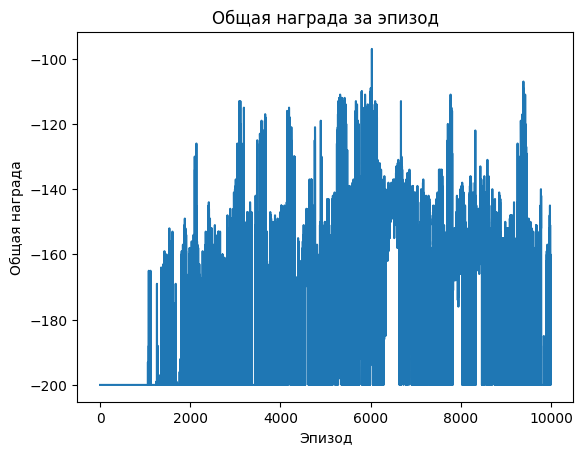

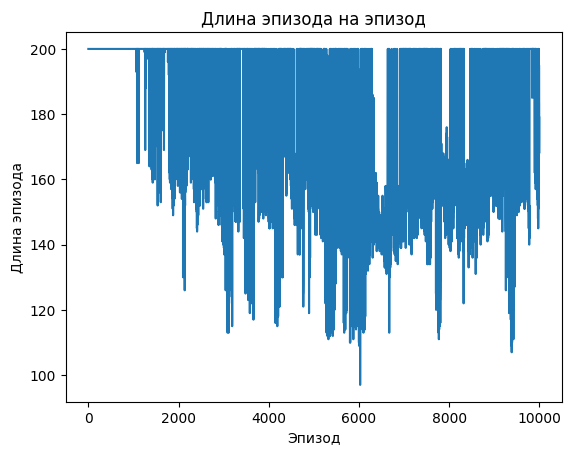

In [17]:
# Визуализация результатов
plt.plot(rewards)
plt.xlabel('Эпизод')
plt.ylabel('Общая награда')
plt.title('Общая награда за эпизод')
plt.show()

plt.plot(episode_lengths)
plt.xlabel('Эпизод')
plt.ylabel('Длина эпизода')
plt.title('Длина эпизода на эпизод')
plt.show()

### Без ε-жадной стратегии (epsilon = 0)

In [18]:
# Инициализация среды и параметров
env = gym.make('MountainCar-v0')

# Параметры
num_episodes = 10000
epsilon = 0
epsilon_decay = 0.999
epsilon_min = 0.01
gamma = 0.99
alpha = 0.1

# Инициализация Q-функции
num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1
Q = np.random.uniform(low=-1, high=1, size=(num_states[0], num_states[1], env.action_space.n))

In [19]:
# Определение функции для выбора действия с использованием ε-жадной стратегии
def choose_action(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Случайное действие
    else:
        return np.argmax(Q[state])  # Жадное действие

In [20]:
# Определение функции для выполнения эпизода
def run_episode(Q, epsilon, alpha, gamma, render=False):
    state = env.reset()
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)

    done = False
    total_reward = 0
    episode_length = 0

    while not done:
        if render:
            env.render()

        action = choose_action(tuple(state_adj), Q, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state_adj = (next_state - env.observation_space.low) * np.array([10, 100])
        next_state_adj = np.round(next_state_adj, 0).astype(int)

        # Обновление Q-функции
        Q[state_adj[0], state_adj[1], action] += alpha * (reward + gamma * np.max(Q[next_state_adj[0], next_state_adj[1]]) - Q[state_adj[0], state_adj[1], action])

        state_adj = next_state_adj
        total_reward += reward
        episode_length += 1

    return total_reward, episode_length

In [21]:
# Обучение агента с использованием алгоритма управления Монте-Карло
rewards = []
episode_lengths = []

for episode in range(num_episodes):
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    total_reward, episode_length = run_episode(Q, epsilon, alpha, gamma)
    rewards.append(total_reward)
    episode_lengths.append(episode_length)

    if (episode + 1) % 500 == 0:
        print(f"Эпизод {episode + 1}, Общая награда: {total_reward}, Длина эпизода: {episode_length}, Эпсилон: {epsilon}")

env.close()

Эпизод 500, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.01
Эпизод 1000, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.01
Эпизод 1500, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.01
Эпизод 2000, Общая награда: -144.0, Длина эпизода: 144, Эпсилон: 0.01
Эпизод 2500, Общая награда: -131.0, Длина эпизода: 131, Эпсилон: 0.01
Эпизод 3000, Общая награда: -142.0, Длина эпизода: 142, Эпсилон: 0.01
Эпизод 3500, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.01
Эпизод 4000, Общая награда: -166.0, Длина эпизода: 166, Эпсилон: 0.01
Эпизод 4500, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.01
Эпизод 5000, Общая награда: -146.0, Длина эпизода: 146, Эпсилон: 0.01
Эпизод 5500, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.01
Эпизод 6000, Общая награда: -138.0, Длина эпизода: 138, Эпсилон: 0.01
Эпизод 6500, Общая награда: -199.0, Длина эпизода: 199, Эпсилон: 0.01
Эпизод 7000, Общая награда: -200.0, Длина эпизода: 200, Эпсилон: 0.01
Эпизод 7500, Общая на

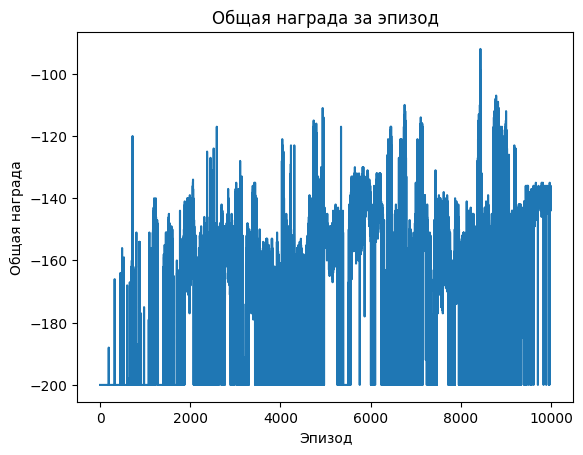

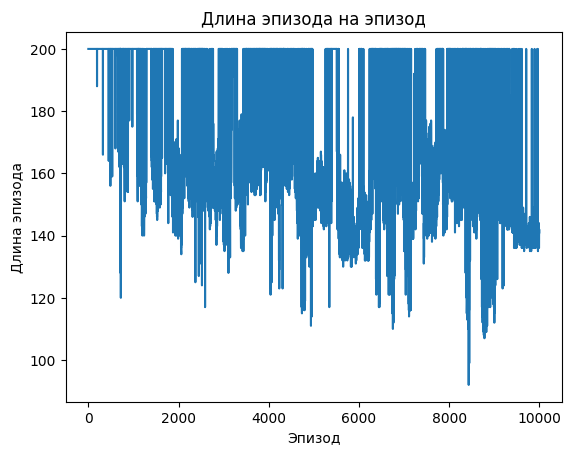

In [22]:
# Визуализация результатов
plt.plot(rewards)
plt.xlabel('Эпизод')
plt.ylabel('Общая награда')
plt.title('Общая награда за эпизод')
plt.show()

plt.plot(episode_lengths)
plt.xlabel('Эпизод')
plt.ylabel('Длина эпизода')
plt.title('Длина эпизода на эпизод')
plt.show()

### ВЫВОД: ε-жадная стратегия позволяет агенту исследовать среду, что особенно полезно на начальных этапах обучения. Это способствует нахождению более оптимальных стратегий. В процессе обучения ε уменьшается, что позволяет агенту все больше полагаться на уже изученную Q-функцию.